In [23]:
import pandas as pd
from rdkit.Chem import rdMolDescriptors
from rdkit import Chem
from rdkit.Chem import rdmolops
from tqdm import tqdm
import matplotlib.pyplot as plt
from collections import defaultdict

In [ ]:
element_dict = defaultdict(int)

def element_counter(mol):
    """
    Count the number of each element in a molecule.
    """

    for atom in mol.GetAtoms():
        element_dict[atom.GetSymbol()] += 1
    
    

In [7]:
with open('./total_set.smi', 'r') as f:
    lines = f.readlines()

In [13]:
rows = []


for line in tqdm(lines):
    row = {
        'SMILES': line.strip(),
        'Molecular Weight': None,
        'Rotatable Bonds': None,
    }
    line = line.strip()
    if line == '':
        continue
    try:
        mol = Chem.MolFromSmiles(line, )
        if mol is None:
            print(f"Invalid SMILES: {line}")
            continue
        mol = rdmolops.AddHs(mol)

        # Calculate the molecular weight
        mw = rdMolDescriptors.CalcExactMolWt(mol)
        rotatable_bonds = rdMolDescriptors.CalcNumRotatableBonds(mol)
        element_counter(mol)
        row['Molecular Weight'] = mw
        row['Rotatable Bonds'] = rotatable_bonds
        row['SMILES'] = line
        rows.append(row)
    except Exception as e:
        print(f"Error processing SMILES '{line}': {e}")

100%|██████████| 56351/56351 [00:07<00:00, 7138.75it/s]


In [15]:
df = pd.DataFrame(rows)
df

,SMILES,Molecular Weight,Rotatable Bonds
0,Brc1nc2cc(I)c(I)cc2[nH]1,447.756906,0
1,Brc1cc(I)c2cccnc2c1,332.865009,0
2,Brc1ccc(I)c2cnccc12,332.865009,0
3,Brc1cc(I)cc2c1NCCC2,336.896309,0
4,Brc1cc(I)c2c(c1)CCCN2,336.896309,0
...,...,...,...
56346,O=Cc1cccc2c1OB(O)[C@@H](Sc1nncs1)C2,292.014765,4
56347,O=Cc1cccc2c1OB(O)[C@H](Sc1nncs1)C2,292.014765,4
56348,O=Cc1ccc(C(=O)B(O)O)s1,184.000160,5
56349,N/N=C\c1ccc(B(O)O)cc1,164.075708,5


In [17]:
df['Molecular Weight'].mean(), df['Molecular Weight'].std(), df['Molecular Weight'].min(), df['Molecular Weight'].max()

(162.99824574151168, 54.327649479049526, 32.008226658, 701.540754716)

In [18]:
df['Rotatable Bonds'].mean(), df['Rotatable Bonds'].std(), df['Rotatable Bonds'].min(), df['Rotatable Bonds'].max()

(2.6332451952937834, 1.873190477090608, 0, 16)

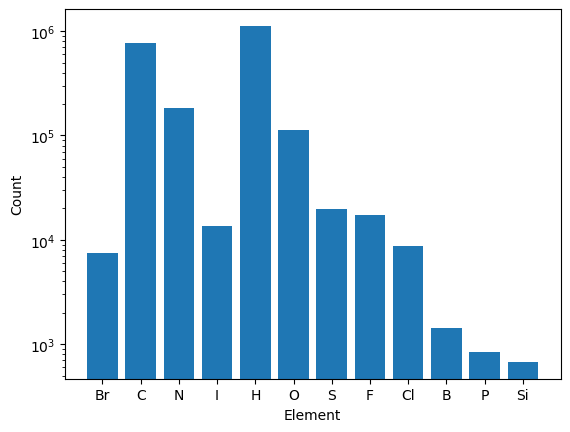

In [31]:
D = dict(element_dict)
plt.bar(range(len(D)), list(D.values()), align='center')
plt.yscale('log')
plt.xticks(range(len(D)), list(D.keys()))
plt.xlabel('Element')
plt.ylabel('Count')
plt.savefig('Element Count in Molecules.png', dpi=300)